# Project: Investigating The No Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
    
</ul>

<a id='intro'></a>
## Introduction

>The No Show Dataset is a Medical dataset that has infromation on over a 100 thousand medical appointments in Brazil. It focuses on whether the patients attended their appointments or missed it. It contains information on patients such as age, Gender, whether they suffer from chronic diseases, Alcoholism or Disability, and whether they are enrolled in Brasilian welfare program "Bolsa Família".

### Research Questions

- What is the percentage of attendance to appointments?
- What factors are important to know in order to predict if a patient will attend their scheduled appointment?

In [1]:
# import needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# using seaborn for a clearer vision of some data visualization
sns.set_style("darkgrid")

<a id='wrangling'></a>
## Data Wrangling

> In this section we are going to load the dataset and check for missing values, duplicates and errors, and clean it to be ready  for analysis.

### General Properties

In [2]:
# Loading the data to a dataframe "df"
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

#### Checking the structure of the dataset and its contents

Checking the first 5 rows of the dataframe:

In [3]:
# print the top 5 rows of the dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


checking the shape of the dataset to understand more about the number of entries inside it:

In [4]:
# printing the shape (rows, columns)
df.shape

(110527, 14)

As it appears we have 110527 Row, and 14 Column in our dataset.

Checking the number of entries and the datatype of each column:

In [5]:
# printing information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As it appears from the table above there is no missing values, but the datatype of the 2 columns are Object instead of Datetime.

Checking for duplicates:

In [6]:
# checking the dataset for dublicates
df.duplicated().sum()

0

No duplicates were found which mean each entry is unique.

Checking the summary Statistics of the dataset:

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


As it appears there is an error in Age column values, which is the minimum value of age is (-1) and that's illogical.

In [8]:
# printing the unique values in the age column
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

We have an age of (-1) which seems to be an error, we will need to know how many entries are effected with that error.

In [9]:
# prinitng the number of entries that has age value of (-1)
df.Age.value_counts()[-1]

1

Only 1 row has the age of (-1)

### Data Cleaning

> Since we don't have neither duplicates nor null values then it means each entry is unique, and in this part we will start cleaning the dataframe by fixing columns names, dropping unnecessary columns and/or rows and changing the values of some other columns for easier access.

It appears that there is a mistake in the name of both columns Hipertension & Handcap, which should be Hypertension & Handicap respectively.

In [10]:
# Renaming columns with their correct names
df.rename(columns = {"Hipertension": "Hypertension", "Handcap": "Handicap"}, inplace = True)

Changing the name of the column "No-Show" to "No_show" for quick and easy access.

In [11]:
# Renaming the column for easier python access to the column
df.rename(columns = {"No-show": "No_show"}, inplace = True)

Changing the values of "No_show" column for easier accessing the values by applying a function to the column value that changes the value of "Yes" to 1 and value of "No" to 0.

In [12]:
# applying a function to the column using lambda funtion
df.No_show = df.No_show.apply(lambda x: 1 if x == "Yes" else 0)

Creating a mask for the patients who attended their appointments and patients who missed it.

In [13]:
attended = df.No_show == 0
missed = df.No_show == 1
# creating new columns that contain the value of True or False based on their values
df["Attended"] = attended
df["Missed"] = missed

As shown above the error of Age = -1 is only in one entry so it will not affect the dataframe to drop it.

In [14]:
# adjustcting the dataframe to only include Age of 0 or older
df = df[(df.Age >= 0)]

The column of "PatientID" seems unnecessary to our investigation, since it has the ID number of the patients.

In [15]:
# dropping "PatientId" column from the dataframe
df.drop(["PatientId"], axis = 1, inplace=True)

Finally, we need to adjust datatype of the columns that have date and time in them. by removing text from them then converting.

In [16]:
# Using  funiction that iterates through the entries of the desired columns
# and remove the texts from each of them and return only date and time
df["AppointmentDay"] = df.AppointmentDay.apply(lambda x: x.replace("T", " ")[:-1] if "T" in x else x)
df["ScheduledDay"] = df.ScheduledDay.apply(lambda x: x.replace("T", " ")[:-1] if "T" in x else x)

In [17]:
# converting the columns to datetime type
df["AppointmentDay"] = pd.to_datetime(df.AppointmentDay)
df["ScheduledDay"] = pd.to_datetime(df.ScheduledDay)

In [18]:
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Attended,Missed
0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False
1,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False
2,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,True,False
3,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,True,False
4,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,True,False


Now the Dataset looks ready for EDA "Exploratory Data Analysis".

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What is the percentage of attendance to appointments?

Using a Pie Chart to represent the the percentage of patients who attended and who missed their appointment.

In [19]:
# assigning each values to the right variable
attended_patients = df.Attended.value_counts()[1]
missed_patients = df.Attended.value_counts()[0]

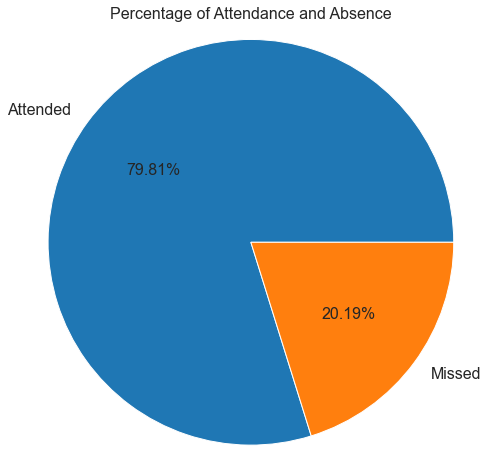

In [20]:
# using matplotlib to create a pie chart for the percentages
data = [attended_patients, missed_patients]
labels = ["Attended", "Missed"]
plt.pie(data, labels=labels, autopct='%1.2f%%', textprops={'fontsize': 16})
plt.title("Percentage of Attendance and Absence",fontdict={'fontsize': 16})
plt.axis("equal")
plt.gcf().set_size_inches(8,8);

**The percentage of patients who Attended their appointments is: 79.81%,
the percentage of patients who Missed their appointments is: 20.19%.**

### Research Question 2: What factors are important for us to know in order to predict if a patient will attend their scheduled appointment?

**Creating bars and Histograms to compare between (Gender, Age, Alcoholism, Handicap, SMS Received, and Scholarship) features of the patients and their attendance to the appointment.**

Calculating statistics and creating a bar chart that for percentage of average attendance of each gender.

In [21]:
# assigning the percentage of average attendance to each gender
male_patients = df.groupby("Gender")["Attended"].mean()[1] * 100
female_patients = df.groupby("Gender")["Attended"].mean()[0] * 100

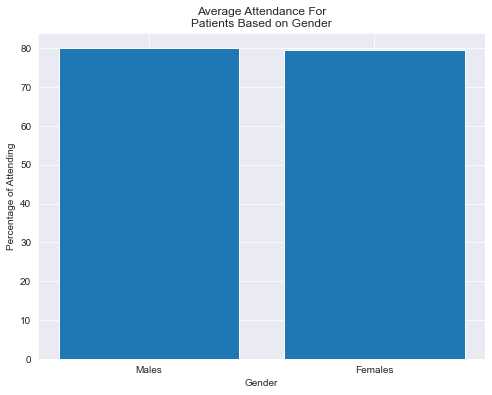

In [22]:
# using matplotlib to create a bar Chart based on gender
locations = [1, 2]
heights = [male_patients, female_patients]
labels = ["Males", "Females"]
plt.bar(locations, heights, tick_label=labels)
plt.title("Average Attendance For\nPatients Based on Gender")
plt.xlabel("Gender")
plt.ylabel("Percentage of Attending")
plt.rc("font", size=18)
plt.gcf().set_size_inches(8,6);

**Based on gender:** On average, the percentage of Male patients who attended their appointments is 80.03%, and female patients is 79.69%.

**No relation was found between gender and attending the appointment since attendance rate is quite close.**

Creating a histogram for Attendance basend on age

In [23]:
# calculating the mean age of patients who attended and those who missed their appointment
age_attend = df.Age[attended].mean()
age_missed = df.Age[missed].mean()

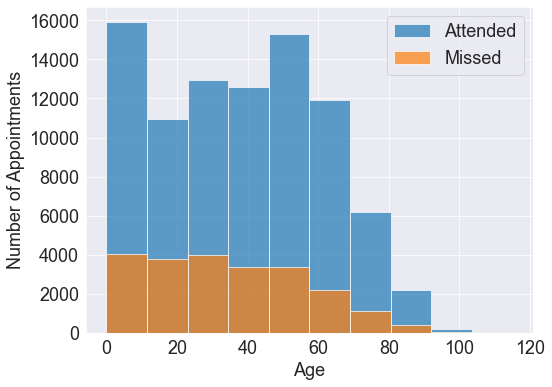

In [24]:
# Creating a histogram that represent age of patients and the number of
# appointments they attended or missed
df.Age[attended].plot(kind="hist", figsize=(8,6), alpha= 0.7, label="Attended")
df.Age[missed].plot(kind="hist", figsize=(8,6), alpha= 0.7, label="Missed")
plt.xlabel("Age")
plt.ylabel("Number of Appointments")
plt.legend();

Creating a bar chart for average age attendance or missing the appointment.

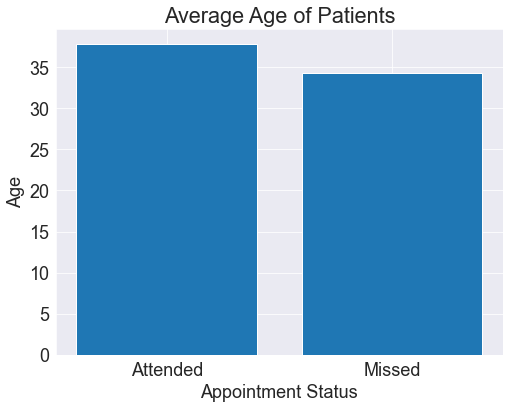

In [25]:
locations = [1, 2]
heights = [age_attend, age_missed]
labels = ["Attended", "Missed"]
plt.bar(locations, heights, tick_label=labels)
plt.title("Average Age of Patients")
plt.xlabel("Appointment Status")
plt.ylabel("Age")
plt.rc("font", size=16)
plt.gcf().set_size_inches(8,6);

**Based on age:** The average age of patients who attended their appointment is 37.79,
while the average age for patients who missed their appoinment is 34.32.

**It seems like the older the patient the more likely for them to attend their appointment.**

Creating a bar chart that has the percentage of average attendance based on alcoholism.

In [26]:
# assigning the percentage of average attendance to each patient type
nonalcoholic = df.groupby("Alcoholism")["Attended"].mean()[0] * 100
alchoholic = df.groupby("Alcoholism")["Attended"].mean()[1] * 100

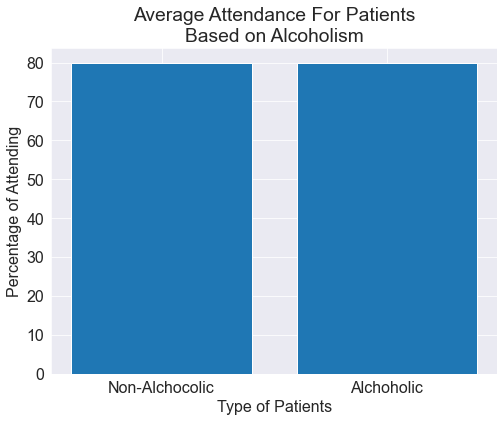

In [27]:
# Creating a bar Chart based on Alcoholism
locations = [1, 2]
heights = [nonalcoholic, alchoholic]
labels = ["Non-Alchocolic", "Alchoholic"]
plt.bar(locations, heights, tick_label=labels)
plt.title("Average Attendance For Patients\nBased on Alcoholism")
plt.xlabel("Type of Patients")
plt.ylabel("Percentage of Attending")
plt.rc("font", size=16)
plt.gcf().set_size_inches(8,6);

**Based on Alcoholism:** On average, the percentage of Non-Alcoholic patients who attended their appointments is 79.81%,
and Alcoholic patients is 79.85%.

**The attendace rate is almost the same for both Non-Alcoholic and Alcoholic patients.**

Creating a bar chart that has the percentage of average attendance based on disablity.

In [28]:
# assigning the percentage of average attendance to each disability type
non_handicap = df.groupby("Handicap")["Attended"].mean()[0] * 100
handicap_1 = df.groupby("Handicap")["Attended"].mean()[1] * 100
handicap_2 = df.groupby("Handicap")["Attended"].mean()[2] * 100
handicap_3 = df.groupby("Handicap")["Attended"].mean()[3] * 100
handicap_4 = df.groupby("Handicap")["Attended"].mean()[4] * 100

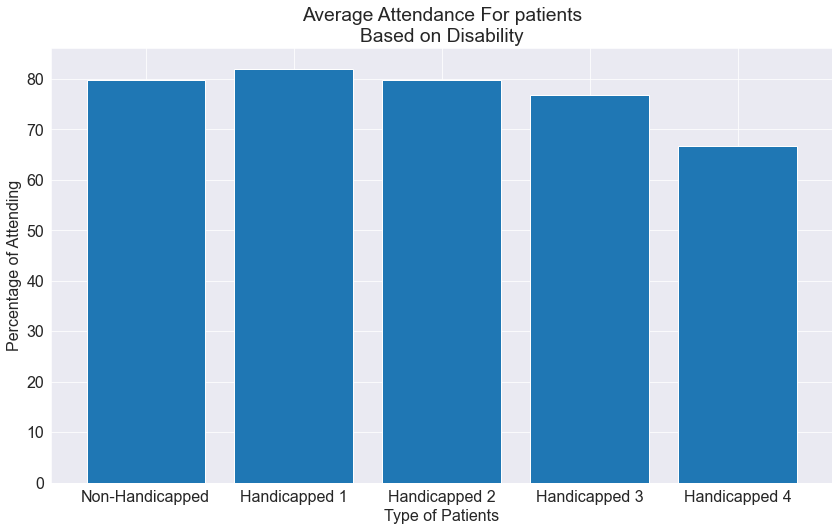

In [29]:
# create a bar Chart based on diability
locations = [1, 2, 3, 4, 5]
heights = [non_handicap, handicap_1, handicap_2, handicap_3, handicap_4]
labels = ["Non-Handicapped", "Handicapped 1", "Handicapped 2", "Handicapped 3", "Handicapped 4"]
plt.bar(locations, heights, tick_label=labels)
plt.title("Average Attendance For patients\nBased on Disability")
plt.xlabel("Type of Patients")
plt.ylabel("Percentage of Attending")
plt.rc("font", size=16)
plt.gcf().set_size_inches(14,8);

**Based on disability:** On average, the percentage of Non-Handicapped patients who attended their appointments is 79.76%, and Handicapped patients are:
- 1- 82.08%
- 2- 79.78%
- 3- 76.92%
- 4- 66.67%

**It appears that there are different types of disability and there is a relation bettwen the type of disability and attendance.**

Creating a bar chart that has the percentage of average attendance based on SMS reminder.

In [30]:
# assigning the percentage of average attendance to each patient type
unreceived = df.groupby("SMS_received")["Attended"].mean()[0] * 100
received = df.groupby("SMS_received")["Attended"].mean()[1] * 100

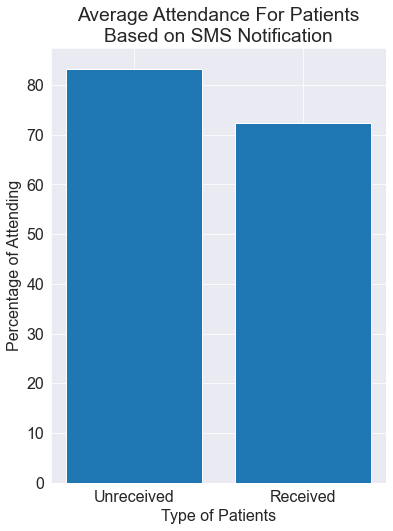

In [31]:
# using matplotlib to create a bar Chart based on SMS
locations = [1, 2]
heights = [unreceived, received]
labels = ["Unreceived", "Received"]
plt.bar(locations, heights, tick_label=labels)
plt.title("Average Attendance For Patients\nBased on SMS Notification")
plt.xlabel("Type of Patients")
plt.ylabel("Percentage of Attending")
plt.rc("font", size=16)
plt.gcf().set_size_inches(6,8);

**Based on SMS Received:** On average, the percentage of patients who attended their appointments and did not recieve a SMS is 83.30%,
and patients who attended and received a SMS is 72.43%

**It appears that receiving a SMS doesn't actually increase the attendance rate and which makes it necessary option.**

In [32]:
# assigning the percentage of average attendance to each subscribtion type
unenrolled = df.groupby("Scholarship")["Attended"].mean()[0] * 100
enrolled = df.groupby("Scholarship")["Attended"].mean()[1] * 100

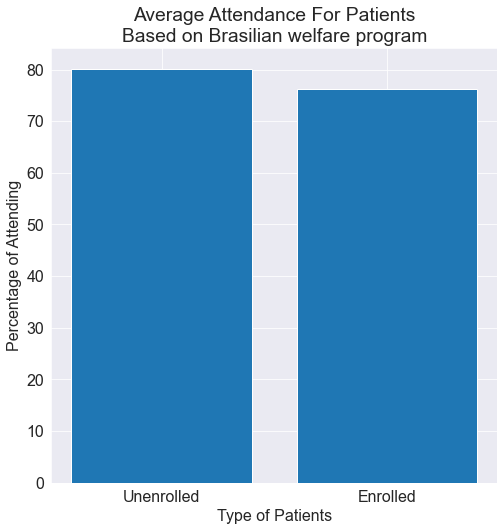

In [33]:
# using matplotlib to create a bar Chart based on SMS
locations = [1, 2]
heights = [unenrolled, enrolled]
labels = ["Unenrolled", "Enrolled"]
plt.bar(locations, heights, tick_label=labels)
plt.title("Average Attendance For Patients\nBased on Brasilian welfare program")
plt.xlabel("Type of Patients")
plt.ylabel("Percentage of Attending")
plt.rc("font", size=16)
plt.gcf().set_size_inches(8,8);

**Based on Scholarship:** On average, the percentage of patients who attended their appointments and Unenrolled is 83.30%,
and patients who attended and enrolled is 72.43%

**No relation was found between being enrolled in the Brasilian welfare program and attending.**

<a id='conclusions'></a>
## Conclusions
- In the beginning. It appears that 20.19% of the appointment were missed, which is roughly 22,315 appointment from the total of 110,526 appointment

- After further investigation. it appeared that Gender, Alcoholism, and Scholarship are not factors that effect on whether patients will attend their appointment or not.

- As we can see, 83.30% of patients who did not recieve a SMS notification attended, while 72.43% of those who did recieve a SMS attended, which makes it this option seems unneccessary.

- It appears that there is a relation between type of disability and attending the appointment, the higher the score the less the average number of patients will attend.

- The second factor that seems affecting the attendance percentage is age, since the average age of patients who attended is 37.79, while the average age for those who did not attend is 34.32, so the older the person the more likely for them to attend their appointment.


<a id='limitations'></a>
## Limitations
**More features could be useful such as:** 
- Employment status.
- Financial situation.
- The medical situation that the patient scheduled an appointment based on.

**More explanation to the type of the disability instead of score (1, 2, 3, 4) could be more useful to understand the reason a patient with disability attended his appointment or not.**